# Storm Identification and Mode Classification 

In [1]:
import sys, os 
current_dir = os.getcwd()
path = os.path.dirname(current_dir)
sys.path.insert(0, path)
import monte_python

In [2]:
from os.path import join
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
import matplotlib
cmap = ListedColormap(["white", "red", "blue", "green", "purple", 'gray'])

In [3]:
from monte_python._plot.plotter import nws_dz_cmap, dz_levels_nws, label_centroid
file_path = join(path, 'monte_python', 'data', 'test_storm_mode.nc')
ds = xr.open_dataset(file_path)

In [4]:
dbz_vals = ds['DBZ'].values
rot_vals = ds['ROT'].values
clf = monte_python.StormModeClassifier()
storm_modes, labels, dbz_props = clf.classify(dbz_vals, rot_vals)

## Identify the Embedded Regions

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

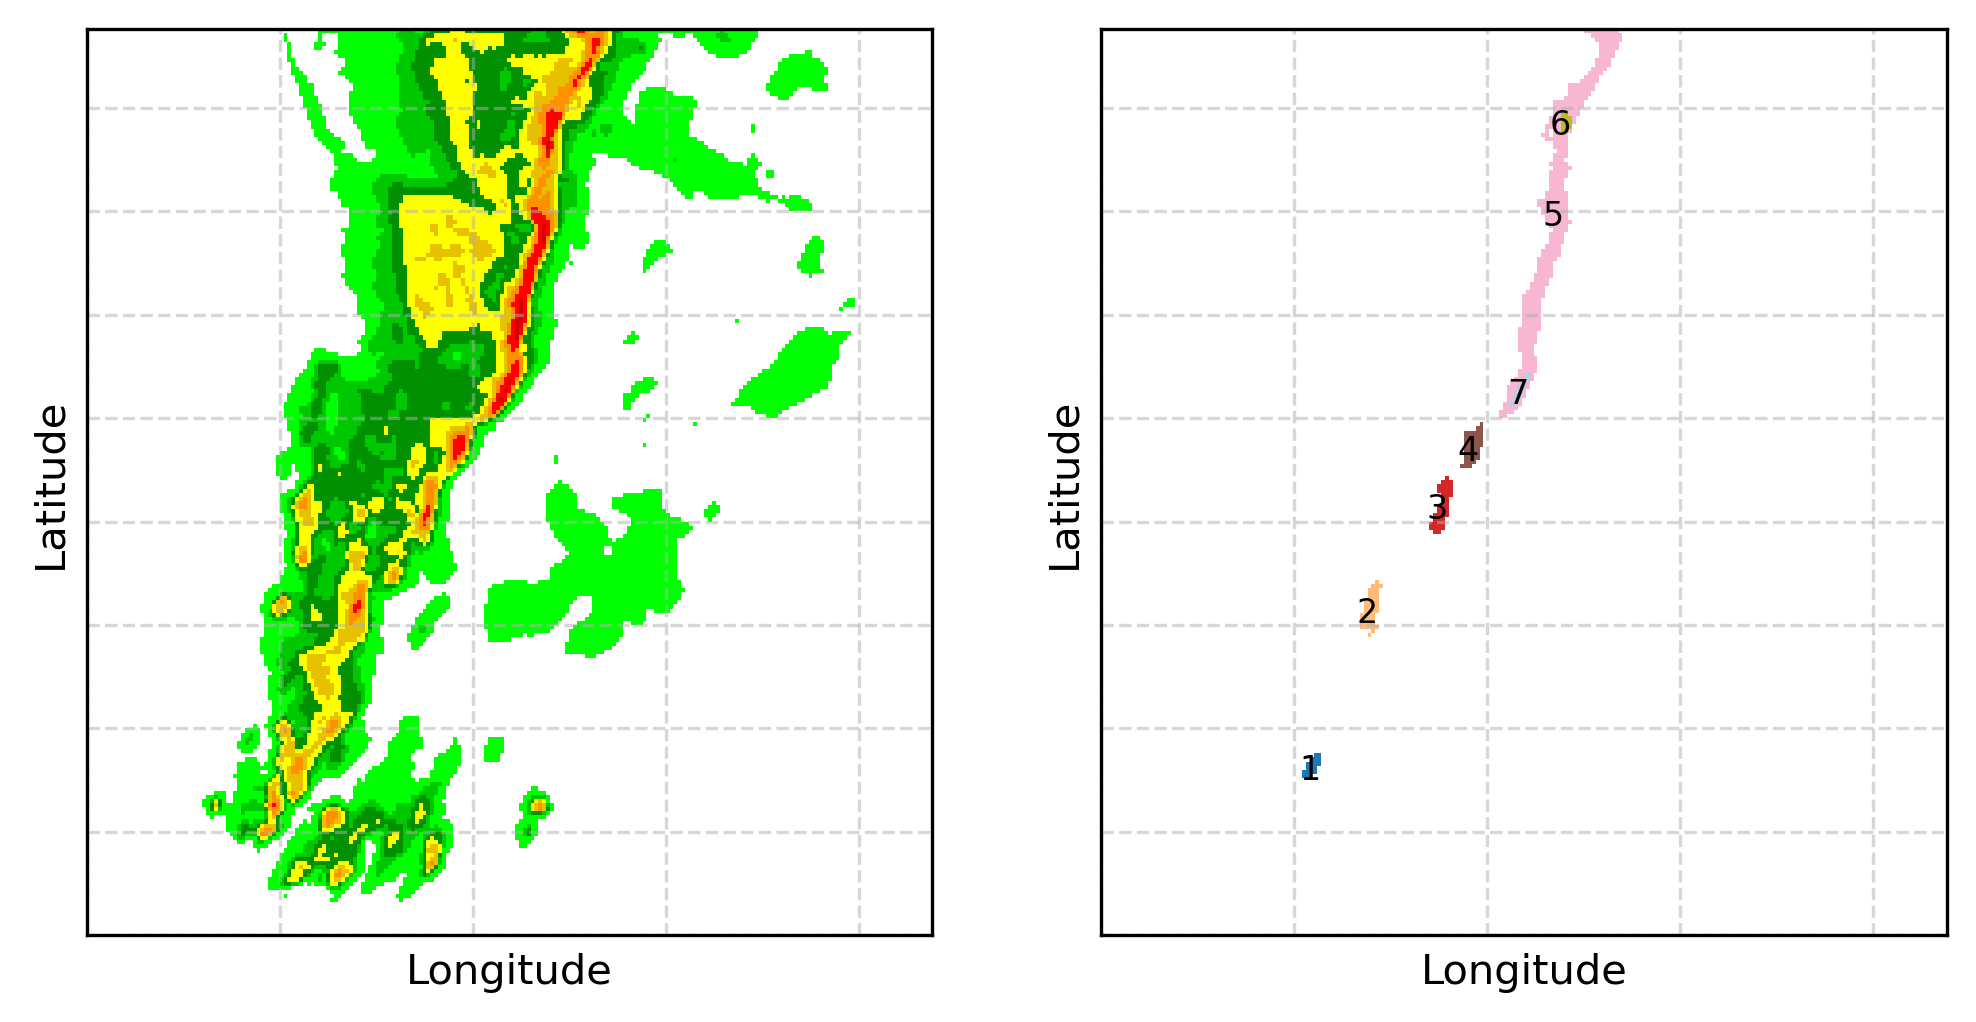

In [5]:
x,y = np.meshgrid(range(220), range(220))
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
monte_python.plot_fake_storms(x, y, np.ma.masked_where(dbz_vals<10., dbz_vals), ax=axes[0], colorbar=False)
monte_python.plot_storm_labels(x, y, labels, dbz_props, ax=axes[1]) 

## Classify the Mode of the Storms

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

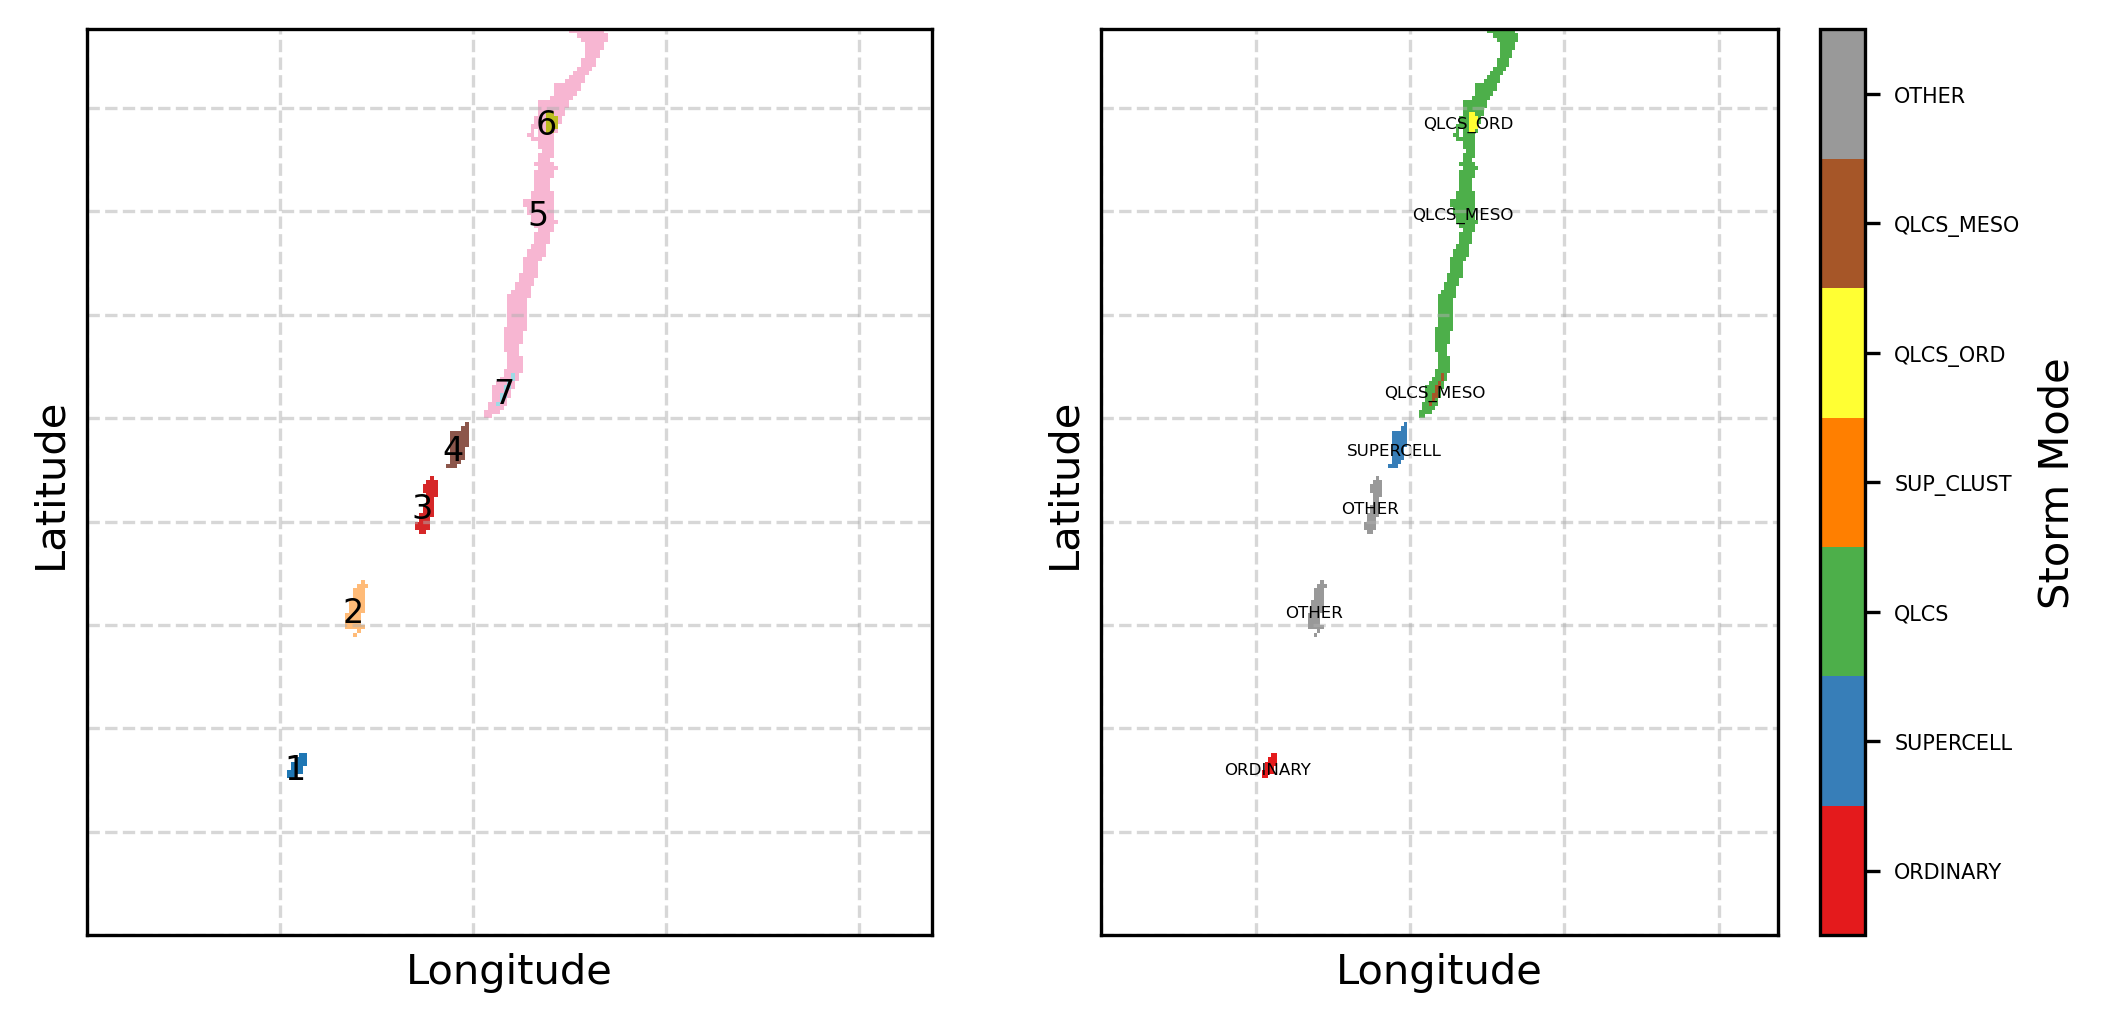

In [6]:
x,y = np.meshgrid(range(220), range(220))
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
monte_python.plot_storm_labels(x, y, labels, dbz_props, ax=axes[0]) 
monte_python.plot_storm_modes(x, y, storm_modes, dbz_props, clf.converter, ax=axes[1]) 